In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from tqdm import tqdm

In [2]:
REPO_PATH = "/Users/johnzhou/research/spike-sorting"
DATA_DIR = f"{REPO_PATH}/data/"
OUT_DIR = f"{REPO_PATH}/output/"
TOTAL_NUM_CHANNELS = 384 # Neuropixels 2.0 probe

### Plot original templates against reconstructed templates

In [3]:
def plot_og_vs_reconstructed(og_templates, recon_templates, n_channels=20, n_samples=20, out_fname=None):
    n_channels = 20
    pdf = matplotlib.backends.backend_pdf.PdfPages(out_fname)
    
    for i in range(n_samples):
        fig = plt.figure(figsize = (n_channels, 2.5))
        plt.plot(recon_templates[i, :80, :].T.flatten(), color='blue')
        for j in range(19):
            plt.axvline(80 + 80*j, color = 'black')
        plt.plot(og_templates[i, :80, :].T.flatten(), color='red')
        for j in range(19):
            plt.axvline(80 + 80*j, color = 'black')
        plt.title("reconstructed: {}".format(i))
        pdf.savefig(fig)

    pdf.close()

### Plot original templates against reconstructed templates using PCA

In [ ]:
num_latents = 10
perturb_feature = "alpha"

og_templates_fname = "og_templates_{}_vary.npy".format(perturb_feature)
og_templates_fpath = os.path.join(OUT_DIR, og_templates_fname)
og_templates = np.load(og_templates_fpath)
print(og_templates.shape)

recon_templates_fname = "recon_templates_{}_vary_latents_{}.npy".format(perturb_feature, num_latents)
recon_templates_fpath = os.path.join(OUT_DIR, recon_templates_fname)
recon_templates = np.load(recon_templates_fpath)
recon_templates = np.swapaxes(recon_templates, 1, 2)
recon_templates = recon_templates

out_fname = "{}visualizations/recon_plots_{}_vary_{}_latents.pdf".format(
    OUT_DIR, perturb_feature, num_latents)

plot_og_vs_reconstructed(og_templates, recon_templates, n_channels=20, n_samples=20, out_fname=out_fname)

### Plot original templates against reconstructed templates with 1 varying positional feature using VAE

(100, 121, 20)


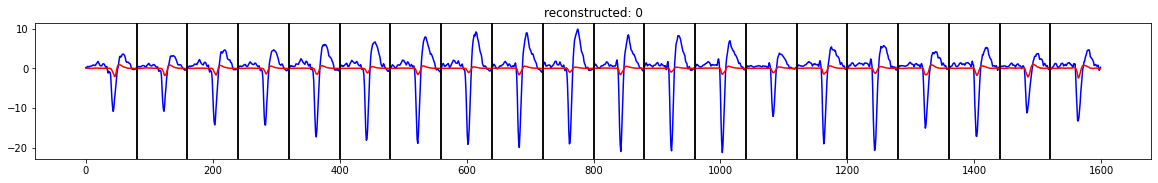

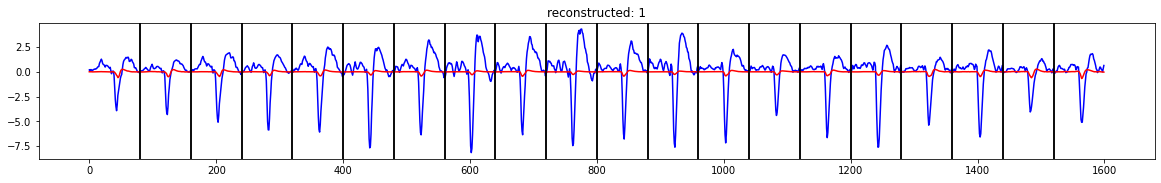

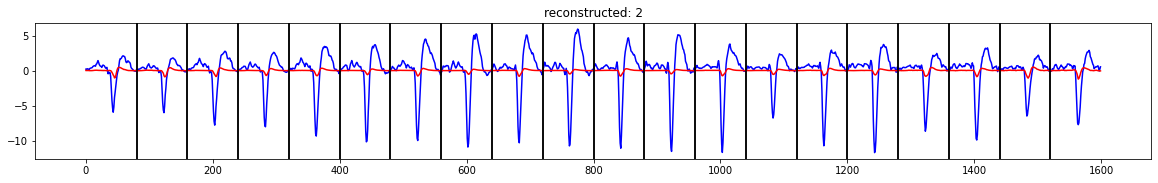

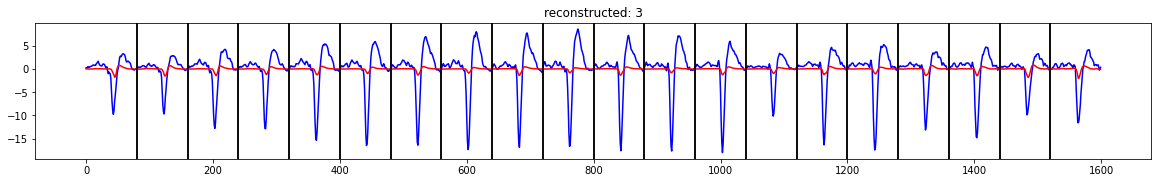

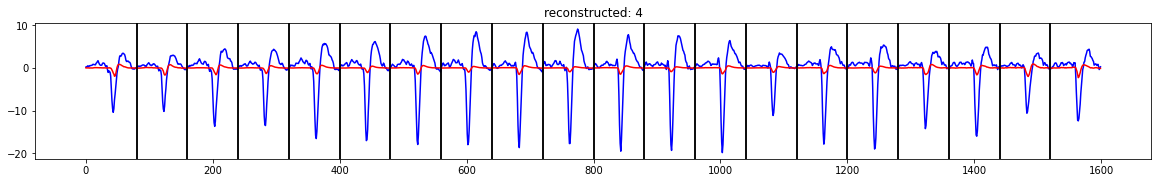

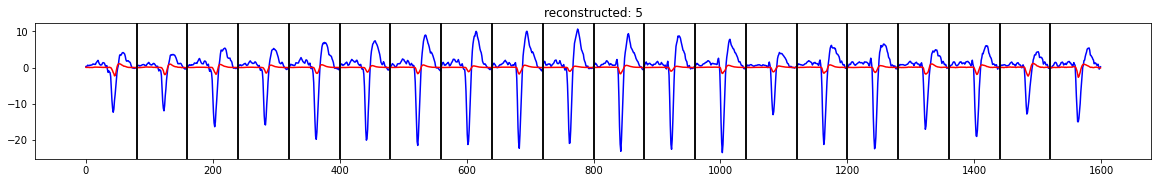

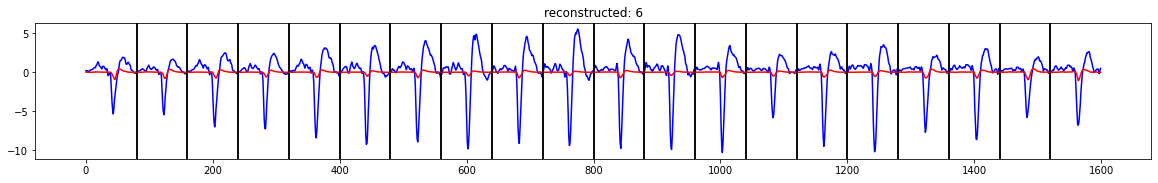

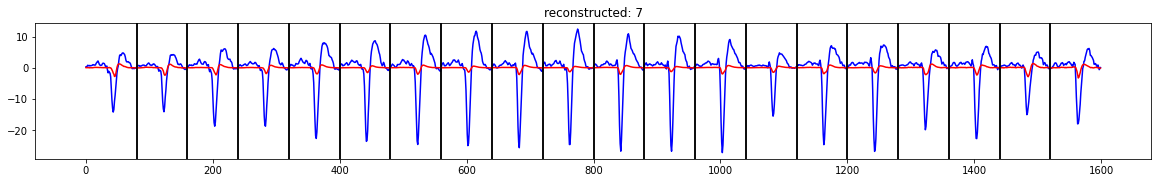

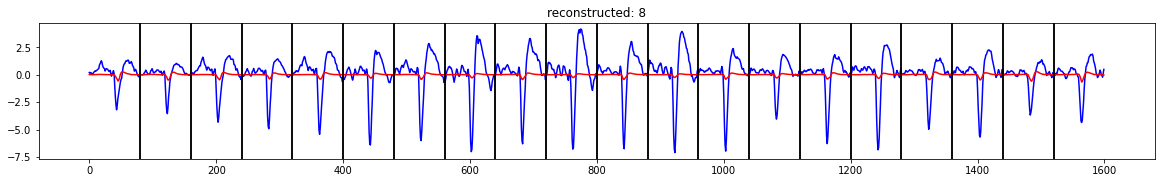

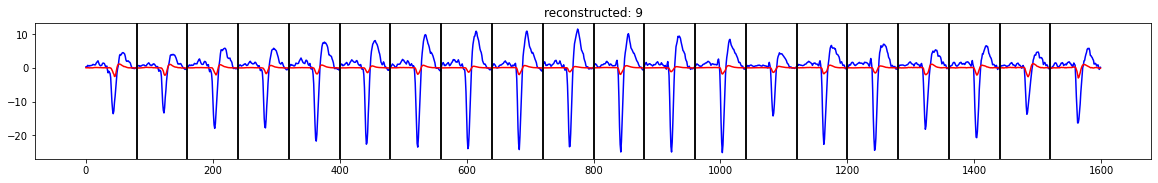

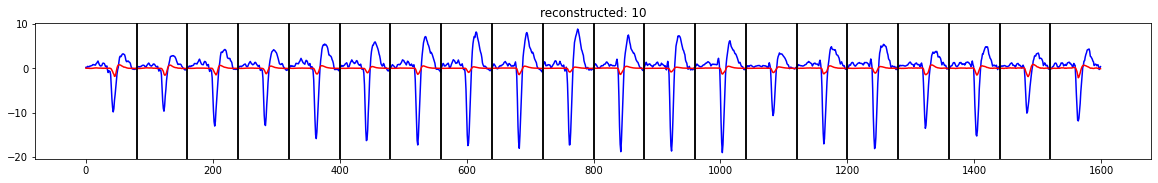

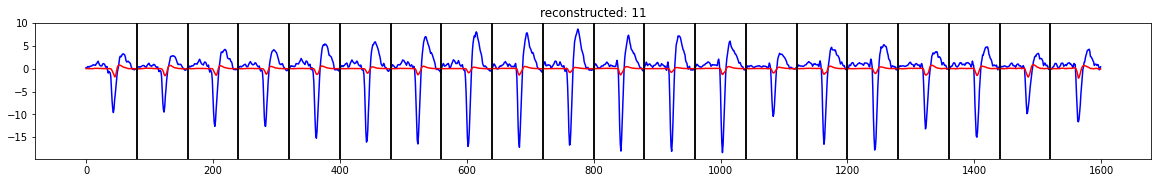

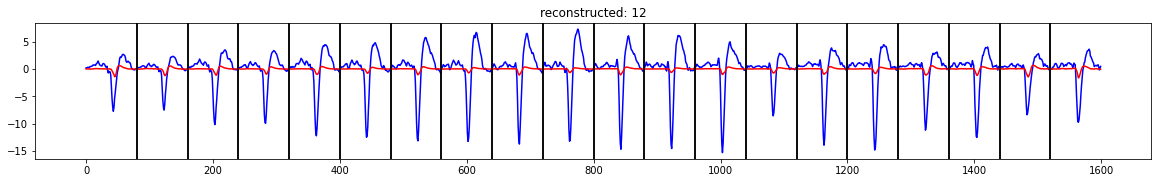

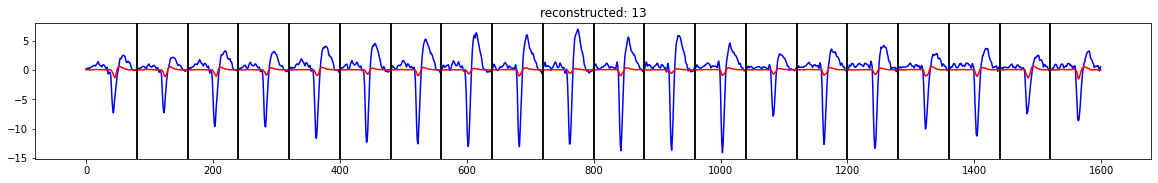

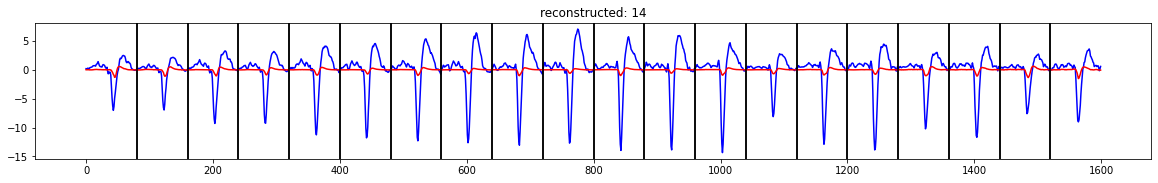

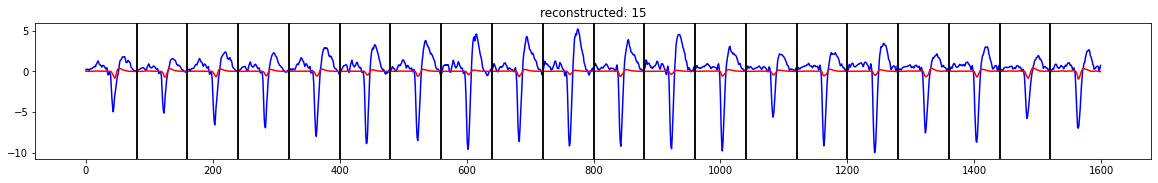

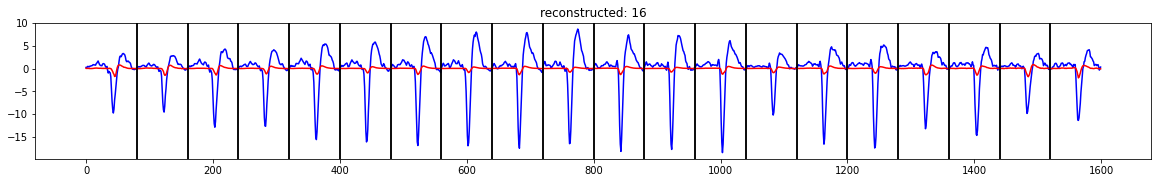

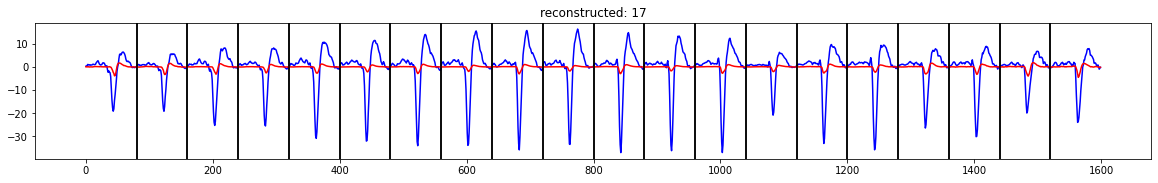

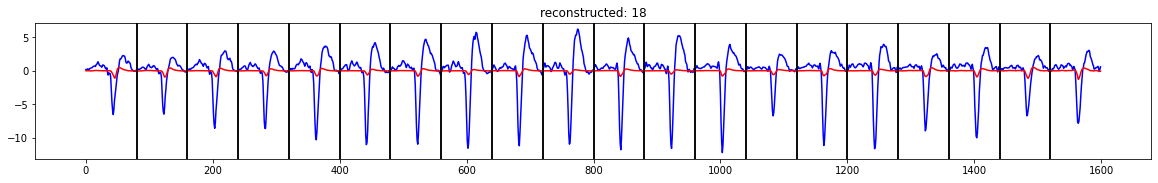

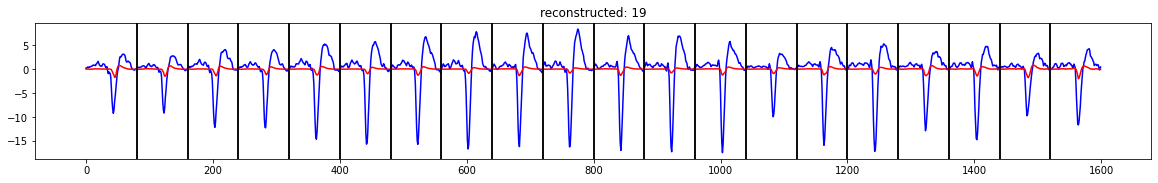

In [9]:
num_latents = 10
perturb_feature = "alpha"

og_templates_fname = "og_templates_{}_vary.npy".format(perturb_feature)
og_templates_fpath = os.path.join(OUT_DIR, og_templates_fname)
og_templates = np.load(og_templates_fpath)
print(og_templates.shape)

recon_templates_fname = "recon_templates_{}_vary_latents_{}.npy".format(perturb_feature, num_latents)
recon_templates_fpath = os.path.join(OUT_DIR, recon_templates_fname)
recon_templates = np.load(recon_templates_fpath)
recon_templates = np.swapaxes(recon_templates, 1, 2)
recon_templates = recon_templates

out_fname = "{}visualizations/recon_plots_{}_vary_{}_latents.pdf".format(
    OUT_DIR, perturb_feature, num_latents)

plot_og_vs_reconstructed(og_templates, recon_templates, n_channels=20, n_samples=20, out_fname=out_fname)

### Visualize latent space and compare against perturbed positional features

In [ ]:
def visualize_latent_space(latent_reps, positions, vary_feature="x"):
    
    num_dims = latent_reps.shape[1]
    fig = plt.figure()
    [xs, zs, ys, alphas] = positions
    if vary_feature == "x":
        x = xs
    elif vary_feature == "z":
        x = zs
    elif vary_feature == "y":
        x = ys
    elif vary_feature == "alpha":
        x = alphas
    for dim in range(num_dims):
        y = latent_reps[:, dim]
        scatter = plt.scatter(x, y, s=5, cmap="viridis", label=dim);
    plt.title("{} vs. latent dims".format(vary_feature))
    plt.xlabel(vary_feature)
    plt.ylabel("latent dims")
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.savefig("{}visualizations/{}_vs_{}_latents.png".format(OUT_DIR, vary_feature, num_dims))

In [ ]:
features = ["x", "y", "z", "alpha"]

num_latents = 10

for feat in features:
    
    position_fname = "{}_vary_positions.npy".format(feat)
    positions = np.load(OUT_DIR + position_fname)
    print(positions.shape)
    # 0: x, 1: z, 2: y, 3: alpha
    [xs, zs, ys, alphas] = positions

    latent_fname = "represent_{}_vary_latents_{}.npy".format(vary_feature, num_latents)
    latent_rep = np.load(OUT_DIR + latent_fname)
    print(latent_rep.shape)
    visualize_latent_space(latent_rep, positions, vary_feature=feat)